<a href="https://colab.research.google.com/github/b3rtram/machine_learning_test/blob/master/mnistfashion_genetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)



Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [ ]:
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.l1 = nn.Linear(28*28, 512)
        self.l2 = nn.Linear(512,256)
        self.l3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.l1(x)
        x = F.leaky_relu(x, 0.2)
        x = self.l2(x)
        x = F.leaky_relu(x, 0.2)
        x = self.l3(x)
        x = F.leaky_relu(x, 0.2)

        return x

torch.Size([1, 28, 28])
tensor([[-0.0199,  0.0051, -0.0030,  0.0119,  0.0831,  0.0484, -0.0015, -0.0233,
          0.0144,  0.0401]], grad_fn=<LeakyReluBackward0>)
tensor([[0.0965, 0.0989, 0.0981, 0.0996, 0.1069, 0.1033, 0.0983, 0.0961, 0.0998,
         0.1024]], grad_fn=<SoftmaxBackward>)
Predicted class: tensor([4])


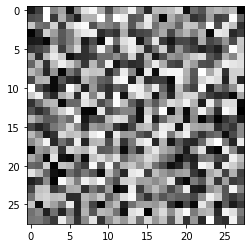

In [ ]:
myModel = NeuralNetwork()
X = torch.rand(1, 28, 28, device=device)
X = X.cpu()
plt.imshow(X.squeeze(), cmap="gray")
print(X.shape)
logits = myModel(X)
print(logits)
pred_probab = nn.Softmax(dim=1)(logits)
print(pred_probab)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Dress


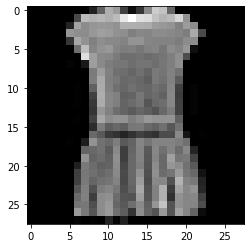

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

img, label = training_data[3]
plt.imshow(img.squeeze(), cmap="gray")
print(labels_map[label])

In [ ]:
logits = myModel(img)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
label_idx = y_pred.tolist()[0]
print(f"Predicted class: {labels_map[label_idx]}")

Predicted class: Bag


In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [ ]:
model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

NeuralNetwork(
  (l1): Linear(in_features=784, out_features=1024, bias=True)
  (l2): Linear(in_features=1024, out_features=512, bias=True)
  (l3): Linear(in_features=512, out_features=256, bias=True)
  (l4): Linear(in_features=256, out_features=128, bias=True)
  (l5): Linear(in_features=128, out_features=10, bias=True)
)
Epoch 1
-------------------------------
loss: 2.297828  [    0/60000]
loss: 2.302000  [ 6400/60000]
loss: 2.291447  [12800/60000]
loss: 2.265228  [19200/60000]
loss: 2.245166  [25600/60000]
loss: 2.213543  [32000/60000]
loss: 2.097711  [38400/60000]
loss: 1.873380  [44800/60000]
loss: 1.524494  [51200/60000]
loss: 1.366462  [57600/60000]
Test Error: 
 Accuracy: 54.0%, Avg loss: 1.236498 

Epoch 2
-------------------------------
loss: 1.265377  [    0/60000]
loss: 1.118742  [ 6400/60000]
loss: 0.943197  [12800/60000]
loss: 1.082662  [19200/60000]
loss: 0.931830  [25600/60000]
loss: 1.007344  [32000/60000]
loss: 0.974976  [38400/60000]
loss: 0.920580  [44800/60000]
loss:

Pullover
tensor([[3.2736e-04, 6.3114e-03, 5.3983e-01, 1.3913e-03, 4.3500e-01, 3.7902e-07,
         1.6860e-02, 6.6804e-08, 2.7921e-04, 6.0731e-07]],
       grad_fn=<SoftmaxBackward>)
Predicted class: Pullover


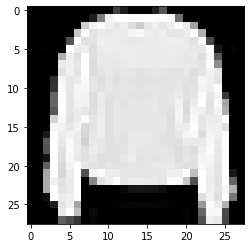

In [ ]:
img, label = training_data[7]
plt.imshow(img.squeeze(), cmap="gray")
print(labels_map[label])
model = model.to("cpu")
logits = model(img)
pred_probab = nn.Softmax(dim=1)(logits)
print(pred_probab)
y_pred = pred_probab.argmax(1)
label_idx = y_pred.tolist()[0]
print(f"Predicted class: {labels_map[label_idx]}")

In [ ]:
success = 0
failure = 0

for t in enumerate(training_data):
  idx, img = t
  label = img[1]
  
  logits = model(img[0])
  pred_probab = nn.Softmax(dim=1)(logits)
  y_pred = pred_probab.argmax(1)
  label_idx = y_pred.tolist()[0]

  if labels_map[label] == labels_map[label_idx]:
    success += 1
  else:
    failure += 1

print(f"success {success} - failure {failure} : {failure * 100 / success}")


success 51987 - failure 8013 : 15.413468751803336
